In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
import time
import json
import pandas as pd
import copy
import seaborn as sns
import sys
sys.path.insert(0, '../src/')

In [2]:
from analyze_utilities import *
from dataset_utilities import create_cifar10_dataloaders

Files already downloaded and verified
Files already downloaded and verified


In [3]:
output_path = '../output/figures'
is_plot_title = False
is_save_fig = False

# Define the data

In [4]:
files_lenet = [
    '../output/pnml_cifar10_lenet_results_20190517_082643/results_pnml_cifar10_lenet_20190517_082643.json',
    '../output/pnml_cifar10_lenet_results_20190517_082659/results_pnml_cifar10_lenet_20190517_082659.json',
    '../output/pnml_cifar10_lenet_results_20190517_082709/results_pnml_cifar10_lenet_20190517_082709.json',
    '../output/pnml_cifar10_lenet_results_20190517_082734/results_pnml_cifar10_lenet_20190517_082734.json',
    '../output/pnml_cifar10_lenet_results_20190517_082746/results_pnml_cifar10_lenet_20190517_082746.json',
    '../output/pnml_cifar10_lenet_results_20190517_082820/results_pnml_cifar10_lenet_20190517_082820.json',
    '../output/pnml_cifar10_lenet_results_20190517_082832/results_pnml_cifar10_lenet_20190517_082832.json',
    '../output/pnml_cifar10_lenet_results_20190517_082844/results_pnml_cifar10_lenet_20190517_082844.json',
    '../output/pnml_cifar10_lenet_results_20190517_082856/results_pnml_cifar10_lenet_20190517_082856.json',
    '../output/pnml_cifar10_lenet_results_20190517_082906/results_pnml_cifar10_lenet_20190517_082906.json',
]

files_nml_2_layers = ['../output/NML_results_20181025_092911/results_TMP_20181025_092911.json',  # 000-099
                      '../output/NML_results_20181025_092956/results_TMP_20181025_092956.json',  # 100-199
                      '../output/NML_results_20181025_093002/results_TMP_20181025_093002.json',  # 200-299
                      '../output/NML_results_20181025_093009/results_TMP_20181025_093009.json',  # 300-399
                      '../output/NML_results_20181025_124946/results_NML_20181025_124946.json',  # 400-499
                      '../output/NML_results_20181025_125050/results_NML_20181025_125050.json',  # 500-599
                      '../output/NML_results_20181025_125116/results_NML_20181025_125116.json',  # 600-699
                      '../output/NML_results_20181025_125155/results_NML_20181025_125155.json',  # 700-799
                      '../output/NML_results_20181025_125239/results_NML_20181025_125239.json',  # 800-899
                      '../output/NML_results_20181025_125317/results_NML_20181025_125317.json',  # 900-999
                      '../output/NML_results_20181025_125338/results_NML_20181025_125338.json',  # 1000-1099
                      '../output/NML_results_20181025_125346/results_NML_20181025_125346.json',  # 1100-1199
                      '../output/NML_results_20181103_100446/results_NML_20181103_100446.json',
                      '../output/NML_results_20181103_101701/results_NML_20181103_101701.json',
                      '../output/NML_results_20181103_101706/results_NML_20181103_101706.json',
                      '../output/NML_results_20181103_103117/results_NML_20181103_103117.json',
                      '../output/NML_results_20181103_103136/results_NML_20181103_103136.json',
                      '../output/NML_results_20181103_103143/results_NML_20181103_103143.json',
                      '../output/NML_results_20181103_103157/results_NML_20181103_103157.json',
                      '../output/NML_results_20181103_100454/results_NML_20181103_100454.json',
                      '../output/NML_results_20181103_100511/results_NML_20181103_100511.json',
                      '../output/NML_results_20181103_100517/results_NML_20181103_100517.json',
                      '../output/NML_results_20181103_101004/results_NML_20181103_101004.json',
                      '../output/NML_results_20181103_101010/results_NML_20181103_101010.json',
                      '../output/NML_results_20181103_101018/results_NML_20181103_101018.json',
                      '../output/NML_results_20181103_101024/results_NML_20181103_101024.json',
                      '../output/NML_results_20181103_101629/results_NML_20181103_101629.json',
                      '../output/NML_results_20181103_101648/results_NML_20181103_101648.json',
                      '../output/NML_results_20181103_104552/results_NML_20181103_104552.json']

# Load Data

In [5]:
# pNML ResNet-18 CIFAR10
print('ResNet-18')
resnet_result_df, statistics_df = load_results_to_df(files_nml_2_layers)
resnet_result_df = resnet_result_df.sort_index()
print(statistics_df.transpose())

# pNML LeNet CIFAR10
print()
print('LeNet')
lenet_result_df, statistics_df = load_results_to_df(files_lenet)
lenet_result_df = lenet_result_df.sort_index()
print(statistics_df.transpose())

ResNet-18
          acc  mean loss  std loss  mean entropy
nml    0.9184   0.167210  0.313679      0.197706
erm    0.9183   0.194359  0.821636      0.024840
genie  0.9875   0.027294  0.230810      0.024752

LeNet
          acc  mean loss  std loss  mean entropy
nml    0.5850   0.545879  0.596893      0.470548
erm    0.5870   0.640403  0.948854      0.313429
genie  0.6996   0.384303  0.570963      0.306122


In [6]:
# ResNet-18
pnml_resnet_df = resnet_result_df[['nml_' + str(x) for x in range(10)]]
resnet_performance_df = resnet_result_df[['nml_loss', 'nml_is_correct']]
regret_resnet_df = resnet_result_df['log10_norm_factor']

# LeNet-5
pnml_lenet_df = lenet_result_df[['nml_' + str(x) for x in range(10)]]
lenet_performance_df = lenet_result_df[['nml_loss', 'nml_is_correct']]
regret_lenet_df = lenet_result_df['log10_norm_factor']


true_label = lenet_result_df['nml_true_label'].tolist()
true_label_series = pd.Series(['nml_{}'.format(label)
                               for label in true_label], index=pnml_resnet_df.index)

In [7]:
# Define output dict
results_dict = {}

#  Genie baseline

In [8]:
prob = pd.Series(pnml_resnet_df.lookup(true_label_series.index, true_label_series),
                 index=true_label_series.index)
acc = (pnml_resnet_df.idxmax(axis=1) == true_label_series).mean()
loss_mean = (-np.log10(prob)).mean()
loss_std = (-np.log10(prob)).std()
results_dict['ResNet18'] = [loss_mean, loss_std, acc, 1.0]

prob = pd.Series(pnml_lenet_df.lookup(true_label_series.index, true_label_series),
                 index=true_label_series.index)
acc = (pnml_lenet_df.idxmax(axis=1) == true_label_series).mean()
loss_mean = (-np.log10(prob)).mean()
loss_std = (-np.log10(prob)).std()
results_dict['LeNet5'] = [loss_mean, loss_std, acc, 0.0]
pd.DataFrame(results_dict, index=['loss mean',
                                  'loss std', 'acc', 'resnet_chosen'])

,ResNet18,LeNet5
loss mean,0.167210,0.545879
loss std,0.313679,0.596893
acc,0.918400,0.585000
resnet_chosen,1.000000,0.000000


In [9]:
loss_list = []
is_correct_list = []
resnet_chosen = 0
z = zip(pnml_resnet_df.iterrows(), pnml_lenet_df.iterrows(),
        resnet_performance_df.iterrows(), lenet_performance_df.iterrows())
for (_, p_resnet), (_, p_lenet), (_, resnet_perf), (_, lenet_perf) in z:
    if resnet_perf['nml_loss'] < lenet_perf['nml_loss']:
        loss_list.append(resnet_perf['nml_loss'])
        is_correct_list.append(resnet_perf['nml_is_correct'])
        resnet_chosen += 1
    else:
        loss_list.append(lenet_perf['nml_loss'])
        is_correct_list.append(lenet_perf['nml_is_correct'])
loss_mean = np.mean(loss_list)
loss_std = np.std(loss_list)
acc = np.mean(is_correct_list)
results_dict['Genie'] = [loss_mean, loss_std,
                         acc, resnet_chosen/pnml_resnet_df.shape[0]]
pd.DataFrame(results_dict, index=['loss mean',
                                  'loss std', 'acc', 'resnet_chosen'])

,ResNet18,LeNet5,Genie
loss mean,0.167210,0.545879,0.137603
loss std,0.313679,0.596893,0.220012
acc,0.918400,0.585000,0.930200
resnet_chosen,1.000000,0.000000,0.875000


# Ensemble Baseline

In [10]:
ensamnle_df = 0.5*(pnml_resnet_df + pnml_lenet_df)
prob = pd.Series(ensamnle_df.lookup(true_label_series.index, true_label_series),
                 index=true_label_series.index)
acc = (ensamnle_df.idxmax(axis=1) == true_label_series).mean()
loss_mean = (-np.log10(prob)).mean()
loss_std = (-np.log10(prob)).std()
results_dict['Ensemble'] = [loss_mean, loss_std, acc, 0.5]
pd.DataFrame(results_dict, index=['loss mean',
                                  'loss std', 'acc', 'resnet_chosen'])

,ResNet18,LeNet5,Genie,Ensemble
loss mean,0.167210,0.545879,0.137603,0.262583
loss std,0.313679,0.596893,0.220012,0.255266
acc,0.918400,0.585000,0.930200,0.840200
resnet_chosen,1.000000,0.000000,0.875000,0.500000


# Twice Universality

In [11]:
twice_u = pd.concat([pnml_resnet_df, pnml_lenet_df]).max(level=0)
twice_u = twice_u.div(twice_u.sum(axis=1), axis='rows')
prob = pd.Series(twice_u.lookup(true_label_series.index, true_label_series),
                 index=true_label_series.index)
acc = (twice_u.idxmax(axis=1) == true_label_series).mean()
loss_mean = (-np.log10(prob)).mean()
loss_std = (-np.log10(prob)).std()
results_dict['Twice U'] = [loss_mean, loss_std, acc, np.NaN]
pd.DataFrame(results_dict, index=['loss mean',
                                  'loss std', 'acc', 'resnet_chosen'])

,ResNet18,LeNet5,Genie,Ensemble,Twice U
loss mean,0.167210,0.545879,0.137603,0.262583,0.291159
loss std,0.313679,0.596893,0.220012,0.255266,0.248659
acc,0.918400,0.585000,0.930200,0.840200,0.849900
resnet_chosen,1.000000,0.000000,0.875000,0.500000,NaN


# Blahut–Arimoto Algorithm

In [12]:
def blahut_arimoto(p_y_x: np.ndarray, thresh: float = 1e-6, debug: bool = False):
    '''
    Maximize the capacity between I(X;Y)
    p_y_x: each row represnets probability assinmnet

    Funciton veriables:
    p_y_x: p(y|x)
    r_x: r(x)
    q_x_y: q(x|y)
    '''
    if abs(p_y_x.sum(axis=1).mean() - 1) > 1e-6:
        print('Warnning: prob is not sum to 1: ', p_y_x.sum(axis=1).mean())
    assert p_y_x.shape[0] > 1
    assert np.sum(p_y_x == 0) == 0
    debug and print('Start blahut_arimoto')
    debug and print('p_y_x: ')
    debug and print(p_y_x)

    # Initialize prior r(x) uniform
    r_x = (1/p_y_x.shape[0]) * np.ones((1, p_y_x.shape[0]))
    c_prev = np.inf
    c_curr = 0
    i = 0
    while np.abs(c_curr-c_prev) > thresh:

        # q(x|y)
        debug and print('Iteration: ', i)
        q_x_y = r_x.T * p_y_x
        debug and print('q_x_y:')
        debug and print(q_x_y)
        q_x_y_norm_factor = q_x_y.sum(axis=1)[:, None]
        debug and print('q_norm_factor: ', q_x_y_norm_factor)
        q_x_y = q_x_y/q_x_y_norm_factor
        debug and print('q_x_y: ', q_x_y)

        # r(x)
        r_x = np.power(q_x_y, p_y_x).prod(axis=1)
        r_x_norm_factor = r_x.sum()
        r_x = r_x / r_x_norm_factor
        r_x = r_x[:, None].T
        debug and print('r_x: ', r_x)

        # Capacity
        c_prev = c_curr
        c_curr = (r_x.T * p_y_x * np.log(q_x_y/r_x.T)).sum()
        debug and print('capacity: ', c_curr)
        debug and print()
        i += 1
    return c_curr, r_x

In [13]:
probs = np.array([[0.7, 0.1, 0.1, 0.1], [0.25, 0.25, 0.25, 0.25]])
# probs = np.array([[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]])
iterations = 10
print(np.sum(probs == 0))
capacity, r_x = blahut_arimoto(probs, debug=True)
print(r_x)

probs = np.array([[0.25, 0.25, 0.25, 0.25], [0.7, 0.1, 0.1, 0.1]])
probs = np.array([[0.7, 0.3], [0.7, 0.3]])
iterations = 100
c, r_x = blahut_arimoto(probs, iterations, True)
print(c, r_x)

0
Start blahut_arimoto
p_y_x: 
[[0.7  0.1  0.1  0.1 ]
 [0.25 0.25 0.25 0.25]]
Iteration:  0
q_x_y:
[[0.35  0.05  0.05  0.05 ]
 [0.125 0.125 0.125 0.125]]
q_norm_factor:  [[0.5]
 [0.5]]
q_x_y:  [[0.7  0.1  0.1  0.1 ]
 [0.25 0.25 0.25 0.25]]
r_x:  [[0.60965122 0.39034878]]
capacity:  -0.4455797314489889

Iteration:  1
q_x_y:
[[0.42675585 0.06096512 0.06096512 0.06096512]
 [0.0975872  0.0975872  0.0975872  0.0975872 ]]
q_norm_factor:  [[0.60965122]
 [0.39034878]]
q_x_y:  [[0.7  0.1  0.1  0.1 ]
 [0.25 0.25 0.25 0.25]]
r_x:  [[0.60965122 0.39034878]]
capacity:  -0.445579731448989

[[0.60965122 0.39034878]]
Start blahut_arimoto
p_y_x: 
[[0.7 0.3]
 [0.7 0.3]]
Iteration:  0
q_x_y:
[[0.35 0.15]
 [0.35 0.15]]
q_norm_factor:  [[0.5]
 [0.5]]
q_x_y:  [[0.7 0.3]
 [0.7 0.3]]
r_x:  [[0.5 0.5]]
capacity:  0.08228287850505177

0.08228287850505177 [[0.5 0.5]]


In [14]:
# GET PNML PROB
bla_ari_df = pd.DataFrame(
    columns=pnml_resnet_df.columns, index=pnml_resnet_df.index)
resnet_chosen = 0
for idx in range(pnml_resnet_df.shape[0]):
    idx % 1000 == 0 and print(idx)
    prob_resnet = pnml_resnet_df.iloc[idx].values
    prob_lenet = pnml_lenet_df.iloc[idx].values
    prob = np.asarray([prob_resnet, prob_lenet])
    prob[prob == 0] = 1e-17
    c, r_x = blahut_arimoto(prob)

    bla_ari_prob = r_x[0][0]*prob_resnet + r_x[0][1]*prob_lenet
    bla_ari_df.iloc[pnml_lenet_df.index[idx]] = bla_ari_prob

    resnet_chosen += r_x[0][0]

bla_ari_df.head()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


,nml_0,nml_1,nml_2,nml_3,nml_4,nml_5,nml_6,nml_7,nml_8,nml_9
0,0.00658238,0.0010543,0.00569271,0.898896,0.0117687,0.00995567,0.0154511,0.000740447,0.0473675,0.00249065
1,0.0247981,0.0880755,7.50823e-05,0.000365016,3.76663e-05,1.8792e-05,6.91876e-05,4.83302e-06,0.886121,0.000434668
2,0.102557,0.265585,0.00742617,0.00209463,0.00100456,0.00280774,0.00165035,0.000882281,0.604223,0.0117694
3,0.386048,0.0454275,0.12417,0.0423527,0.0127835,0.000388271,0.003742,0.00123719,0.335991,0.0478601
4,1.48459e-05,2.37202e-05,0.00566503,0.00118006,0.240128,0.000225922,0.749299,0.00158297,0.00186032,2.05357e-05


In [15]:
prob = pd.Series(bla_ari_df.lookup(true_label_series.index, true_label_series),
                 index=true_label_series.index)
acc = (bla_ari_df.astype('float').idxmax(axis=1) == true_label_series).mean()
loss_mean = (-np.log10(prob)).mean()
loss_std = (-np.log10(prob)).std()
results_dict['Blahut-Arimoto'] = [loss_mean,
                                  loss_std, acc, resnet_chosen/bla_ari_df.shape[0]]
pd.DataFrame(results_dict, index=['loss mean',
                                  'loss std',  'acc', 'resnet_chosen'])

,ResNet18,LeNet5,Genie,Ensemble,Twice U,Blahut-Arimoto
loss mean,0.167210,0.545879,0.137603,0.262583,0.291159,0.214068
loss std,0.313679,0.596893,0.220012,0.255266,0.248659,0.273790
acc,0.918400,0.585000,0.930200,0.840200,0.849900,0.856200
resnet_chosen,1.000000,0.000000,0.875000,0.500000,NaN,0.638773


# ML of pNMLs

In [16]:
loss_list = []
is_correct_list = []
resnet_chosen = 0
z = zip(pnml_resnet_df.iterrows(), pnml_lenet_df.iterrows(),
        resnet_performance_df.iterrows(), lenet_performance_df.iterrows())
for (_, p_resnet), (_, p_lenet), (_, resnet_perf), (_, lenet_perf) in z:
    if p_resnet.max() > p_lenet.max():
        loss_list.append(resnet_perf['nml_loss'])
        is_correct_list.append(resnet_perf['nml_is_correct'])
        resnet_chosen += 1
    else:
        loss_list.append(lenet_perf['nml_loss'])
        is_correct_list.append(lenet_perf['nml_is_correct'])
loss_mean = np.mean(loss_list)
loss_std = np.std(loss_list)
results_dict['Max Likelihood'] = [loss_mean, loss_std, np.mean(
    is_correct_list), resnet_chosen/pnml_resnet_df.shape[0]]
pd.DataFrame(results_dict, index=['loss mean',
                                  'loss std', 'acc', 'resnet_chosen']).round(3)

,ResNet18,LeNet5,Genie,Ensemble,Twice U,Blahut-Arimoto,Max Likelihood
loss mean,0.167,0.546,0.138,0.263,0.291,0.214,0.241
loss std,0.314,0.597,0.220,0.255,0.249,0.274,0.531
acc,0.918,0.585,0.930,0.840,0.850,0.856,0.850
resnet_chosen,1.000,0.000,0.875,0.500,NaN,0.639,0.773


# Twice Universal Between ERM and pNML

In [17]:
# pNML ResNet-18 CIFAR10
print('ResNet-18')
resnet_result_df, statistics_df = load_results_to_df(files_nml_2_layers)
resnet_result_df = resnet_result_df.sort_index()
print(statistics_df.transpose())

# pNML LeNet CIFAR10
print()
print('LeNet')
lenet_result_df, statistics_df = load_results_to_df(files_lenet)
lenet_result_df = lenet_result_df.sort_index()
print(statistics_df.transpose())

ResNet-18
          acc  mean loss  std loss  mean entropy
nml    0.9184   0.167210  0.313679      0.197706
erm    0.9183   0.194359  0.821636      0.024840
genie  0.9875   0.027294  0.230810      0.024752

LeNet
          acc  mean loss  std loss  mean entropy
nml    0.5850   0.545879  0.596893      0.470548
erm    0.5870   0.640403  0.948854      0.313429
genie  0.6996   0.384303  0.570963      0.306122


## ResNet-18

In [18]:
# ResNet-18
pnml_df = resnet_result_df[['nml_' + str(x) for x in range(10)]]
erm_df = resnet_result_df[['erm_' + str(x) for x in range(10)]]
pnml_performance_df = resnet_result_df[['nml_loss', 'nml_is_correct']]
erm_performance_df = resnet_result_df[['erm_loss', 'erm_is_correct']]
regret_df = resnet_result_df['log10_norm_factor']

true_label = resnet_result_df['nml_true_label'].tolist()
true_label_pnml_series = pd.Series(['nml_{}'.format(label)
                                    for label in true_label], index=pnml_df.index)
true_label_erm_series = pd.Series(['erm_{}'.format(label)
                                   for label in true_label], index=erm_df.index)

# Define outputs
results_dict = {}

## LeNet5

In [19]:
pnml_df = lenet_result_df[['nml_' + str(x) for x in range(10)]]
erm_df = lenet_result_df[['erm_' + str(x) for x in range(10)]]
pnml_performance_df = lenet_result_df[['nml_loss', 'nml_is_correct']]
erm_performance_df = lenet_result_df[['erm_loss', 'erm_is_correct']]
regret_df = lenet_result_df['log10_norm_factor']

true_label = lenet_result_df['nml_true_label'].tolist()
true_label_pnml_series = pd.Series(['nml_{}'.format(label)
                                    for label in true_label], index=pnml_df.index)
true_label_erm_series = pd.Series(['erm_{}'.format(label)
                                   for label in true_label], index=erm_df.index)

# Define outputs
results_dict = {}

### Genie

In [20]:
prob = pd.Series(pnml_df.lookup(true_label_pnml_series.index, true_label_pnml_series),
                 index=true_label_pnml_series.index)
acc = (pnml_df.idxmax(axis=1) == true_label_pnml_series).mean()
loss_mean = (-np.log10(prob)).mean()
loss_std = (-np.log10(prob)).std()
results_dict['pNML'] = [loss_mean, loss_std, acc, 1.0]

prob = pd.Series(erm_df.lookup(true_label_erm_series.index, true_label_erm_series),
                 index=true_label_erm_series.index)
acc = (erm_df.idxmax(axis=1) == true_label_erm_series).mean()
loss_mean = (-np.log10(prob)).mean()
loss_std = (-np.log10(prob)).std()
results_dict['ERM'] = [loss_mean, loss_std, acc, 0.0]

loss_list = []
is_correct_list = []
pnml_chosen = 0
z = zip(pnml_df.iterrows(), erm_df.iterrows(),
        pnml_performance_df.iterrows(), erm_performance_df.iterrows())
for (_, p_pnml), (_, p_erm), (_, pnml_perf), (_, erm_perf) in z:
    if pnml_perf['nml_loss'] < erm_perf['erm_loss']:
        loss_list.append(pnml_perf['nml_loss'])
        is_correct_list.append(pnml_perf['nml_is_correct'])
        pnml_chosen += 1
    else:
        loss_list.append(erm_perf['erm_loss'])
        is_correct_list.append(erm_perf['erm_is_correct'])
loss_mean = np.mean(loss_list)
loss_std = np.std(loss_list)
acc = np.mean(is_correct_list)
results_dict['Genie'] = [loss_mean, loss_std,
                         acc, pnml_chosen/pnml_df.shape[0]]
pd.DataFrame(results_dict, index=['loss mean',
                                  'loss std', 'acc', 'pnml_chosen'])

,pNML,ERM,Genie
loss mean,0.545879,0.640403,0.466456
loss std,0.596893,0.948854,0.609159
acc,0.585000,0.587000,0.622700
pnml_chosen,1.000000,0.000000,0.329400


### Twice universal erm-pnml

In [21]:
rename_dict = {}
for i in range(10):
    rename_dict['erm_' + str(i)] = 'nml_' + str(i)
erm_df_renamed = erm_df.rename(index=str, columns=rename_dict)
erm_df_renamed.index = erm_df_renamed.index.astype(int)

twice_u = pd.concat([pnml_df, erm_df_renamed]).max(level=0)
twice_u = twice_u.div(twice_u.sum(axis=1), axis='rows')
prob = pd.Series(twice_u.lookup(true_label_pnml_series.index, true_label_pnml_series),
                 index=true_label_pnml_series.index)
acc = (twice_u.idxmax(axis=1) == true_label_pnml_series).mean()
loss_mean = (-np.log10(prob)).mean()
loss_std = (-np.log10(prob)).std()
results_dict['Twice U'] = [loss_mean, loss_std, acc, np.NaN]
pd.DataFrame(results_dict, index=['loss mean',
                                  'loss std', 'acc', 'resnet_chosen'])

,pNML,ERM,Genie,Twice U
loss mean,0.545879,0.640403,0.466456,0.540009
loss std,0.596893,0.948854,0.609159,0.618327
acc,0.585000,0.587000,0.622700,0.589300
resnet_chosen,1.000000,0.000000,0.329400,NaN


# A-B with genies

In [22]:
def extract_genie_probabilities_list(evaluation_dict, label):
    # Extract to probabilities of the model which was trained with the true label
    # return list of probabilities
    true_label = evaluation_dict['true_label']
    prob_genie = np.array(evaluation_dict[str(label)]['prob'])
    predicted_genie_label = np.argmax(prob_genie)
    return prob_genie, true_label, predicted_genie_label


def result_dict_to_genie_df(results_dict: dict, genie_label: int):
    # Initialize columns to df
    df_col = [str(x) for x in range(10)] + ['true_label', 'loss', 'entropy']
    genie_dict = {}
    for col in df_col:
        genie_dict[col] = []
    loc = []

    # Iterate on keys
    for keys in results_dict:
        # extract probability of test sample
        sample_dict = results_dict[keys]
        prob_genie, true_label, predicted_genie_label = extract_genie_probabilities_list(
            sample_dict, genie_label)
        genie_dict['true_label'].append(true_label)
        genie_dict['loss'].append(compute_log_loss(prob_genie, true_label))
        for prob_label, prob_single in enumerate(prob_genie):
            genie_dict[str(prob_label)].append(prob_single)
        genie_dict['entropy'].append(entropy(prob_genie, base=10))
        loc.append(int(keys))

    # Create df
    genie_df = pd.DataFrame(genie_dict, index=loc)

    # Add more columns
    is_correct = np.array(genie_df[[str(x) for x in range(10)]].idxmax(axis=1)).astype(int) == np.array(
        genie_df['true_label']).astype(int)
    genie_df['is_correct'] = is_correct
    return genie_df

In [29]:
genie_df_dict = {}
for label in range(10):
    print(label)
    df = result_dict_to_genie_df(
        load_dict_from_file_list(files_nml_2_layers), label)
    genie_df_dict[str(label)] = df.sort_index()

0
1
2
3
4
5
6
7
8
9


In [30]:
genie_prob_dict = {}
for key, df in genie_df_dict.items():
    genie_prob_dict[key] = genie_df_dict[key][[str(x) for x in range(10)]]
genie_prob_dict['0'].head(10)

,0,1,2,3,4,5,6,7,8,9
0,1.630000e-13,3.423280e-11,8.932100e-12,1.000000e+00,9.200000e-15,1.447864e-09,6.371300e-12,8.999999e-16,5.272000e-13,1.000000e-16
1,2.803229e-09,2.944539e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.999998e-01,1.510000e-14
2,2.582117e-05,8.792617e-03,3.815454e-08,2.851560e-11,2.017300e-12,1.106780e-11,1.467020e-11,7.652678e-10,9.911814e-01,9.219306e-08
3,9.996232e-01,3.579738e-07,1.097591e-05,1.072415e-06,3.110100e-12,2.475210e-11,4.412790e-11,3.377110e-11,3.630718e-04,1.281089e-06
4,6.000000e-15,8.097800e-12,1.193450e-10,4.078240e-11,1.386000e-13,8.000000e-16,1.000000e+00,0.000000e+00,1.340000e-14,6.535000e-13
5,1.182580e-11,1.033670e-11,7.012354e-10,1.365573e-03,3.124615e-09,1.251560e-07,9.986343e-01,1.225600e-12,3.059400e-12,1.070703e-10
6,1.818052e-05,9.990661e-01,1.406799e-10,8.861635e-04,3.893400e-11,5.242782e-09,1.264590e-09,1.801360e-10,2.274858e-10,2.959475e-05
7,6.140488e-06,1.615746e-09,4.962822e-04,1.454966e-08,2.876538e-07,4.707337e-07,9.994968e-01,1.020638e-07,1.300751e-10,4.252876e-08
8,3.817360e-11,2.780000e-14,1.082000e-13,9.997941e-01,3.398086e-09,2.059090e-04,6.076900e-12,1.246240e-11,8.500000e-15,3.820000e-14
9,2.144776e-10,9.999996e-01,4.599200e-12,5.008592e-10,2.960000e-13,7.370000e-14,1.394060e-11,4.947000e-13,5.156828e-07,1.385705e-08


In [31]:
# GET PNML PROB
iterations = 10
bla_ari_df = pd.DataFrame(
    columns=pnml_resnet_df.columns, index=pnml_resnet_df.index)
resnet_chosen = 0
capacity_list = []
for idx in range(pnml_resnet_df.shape[0]):
    idx % 1000 == 0 and print(idx)
    prob_list = [df.iloc[idx].values for key, df in genie_prob_dict.items()]
    prob = np.asarray(prob_list)
    prob[prob == 0] = 1e-17
    c, r_x = blahut_arimoto(prob)

    bla_ari_prob = np.zeros(prob.shape[1])
    for r, prob_single in zip(r_x[0], prob_list):
        bla_ari_prob += r*prob_single
    bla_ari_df.iloc[pnml_lenet_df.index[idx]] = bla_ari_prob
    capacity_list.append(c)

bla_ari_df.head()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


,nml_0,nml_1,nml_2,nml_3,nml_4,nml_5,nml_6,nml_7,nml_8,nml_9
0,2.941e-14,6.14092e-10,2.49017e-10,1,1.6142e-13,5.01953e-08,8.20875e-11,7.8e-15,5.68613e-12,1e-15
1,2.93243e-10,1.16862e-06,0,0,0,0,2.00002e-17,0,0.999999,4.61905e-14
2,3.0345e-06,0.0514577,1.10167e-05,1.24624e-09,3.24042e-10,1.02518e-09,1.38348e-09,4.15915e-07,0.948527,3.30558e-07
3,0.786931,0.00023749,0.0348852,0.00579326,6.11981e-08,3.07991e-08,1.23616e-07,2.65246e-08,0.170087,0.0020664
4,1e-15,1.06395e-10,7.0883e-10,7.67153e-10,2.03827e-12,1.003e-14,1,0,7.187e-14,4.76294e-10


In [32]:
prob = pd.Series(bla_ari_df.lookup(true_label_series.index, true_label_series),
                 index=true_label_series.index)
bla_ari_is_true = (bla_ari_df.astype(
    'float').idxmax(axis=1) == true_label_series)
acc = bla_ari_is_true.mean()
print('loss: ', (-np.log10(prob)).mean())
print('loss std: ', (-np.log10(prob)).std())
print('Acc: ', acc)

loss:  0.11855813263326968
loss std:  0.36678653684984186
Acc:  0.9178


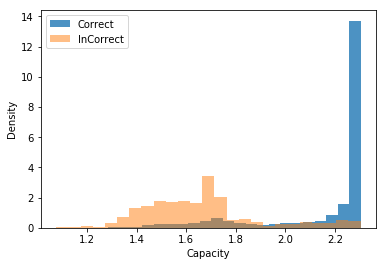

In [36]:
capacity_np = np.array(capacity_list)
capacity_correct = capacity_np[bla_ari_is_true]
capacity_incorrect = capacity_np[~bla_ari_is_true]
bins = 25
fig = plt.figure(facecolor='w')
plt.hist(capacity_correct, alpha=0.8, bins=bins,
         density=True, label='Correct')
plt.hist(capacity_incorrect, alpha=0.5, bins=bins,
         density=True, label='InCorrect')
plt.xlabel('Capacity')
plt.ylabel('Density')
# plt.xlim(left=0.0)
plt.legend()
plt.show()